## <center>What we learnt yesterday... </center>
##### - compared regression, classification, and clustering
##### - linear and logistic regression
##### - mean squared error and accuracy metric
##### - bias-variance trade-off and the ML pipeline

## <center>Intro to Machine Learning, part 2 </center>
### By the end of the day, you will be able to
#### - describe how decision trees and tree-based ensemble methods work
#### - choose classification metric to evaluate your classification model
#### - choose regression metric to evaluate your regression model
#### - design more complex ML pipelines

## <center>Decision trees and random forests</center>
### Decision tree: the data is split according to certain features
### Here is an example tree fitted to data:

<center><img src=https://www.xoriant.com/blog/wp-content/uploads/2017/08/Decision-Trees-modified-1.png width="500"></center>

<center><img src=https://www.xoriant.com/blog/wp-content/uploads/2017/08/Decision-Trees-modified-1.png width="500"></center>

#### Trees have nodes and leaves.
#### The max depth of the tree is a hyperparameter.
#### The critical values and features in the nodes are parameters.

#### Random forest: ensemble of random decision trees
#### Each tree sees a random subset of the training data, that's why the forest is random.

<center><img src=https://cdn-images-1.medium.com/max/1600/1*i0o8mjFfCn-uD79-F1Cqkw.png width="450"></center>

#### The number of trees is a hyperparameter.


### <center>Exercise 1 </center>
#### Create a decision tree with max_depth = 2 to predict the target variable! What is your tree's prediction for each person?
#### Remember, your tree does not need predict everyone perfectly.
#### It just needs to get as many people as possible right.

| X|age|gender (M=0, F=1)|is student?|is parent?|uses computer for work?|nr. of hours on c.|<font color='red'>Like computer games?</font>|
|-|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|__person 1__| 5|0|1|0|0|0.0|__<font color='red'>1</font>__|
|__person 2__|48|1|0|1|0|1.8|__<font color='red'>1</font>__|
|__person 3__|62|0|0|1|0|0.2|__<font color='red'>0</font>__|
|__person 4__|10|1|1|0|0|2.4|__<font color='red'>1</font>__|
|__person 5__|23|1|1|0|1|4.2|__<font color='red'>0</font>__|
|__person 6__|36|0|0|0|1|3.1|__<font color='red'>1</font>__|
|__person 7__|12|0|1|0|0|3.1|__<font color='red'>1</font>__|
|__person 8__|85|0|0|0|1|1.0|__<font color='red'>0</font>__|
|__person 9__|33|1|1|1|0|1.5|__<font color='red'>0</font>__|
|__person 10__|56|0|0|0|1|0.1|__<font color='red'>1</font>__|

### <center> Random forest in regression</center>

In [1]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# the true function
def true_fun(X):
    return np.cos(1.5 * np.pi * X)


In [2]:
# create training data X and y
np.random.seed(10)
n_samples = 30
X = np.random.rand(n_samples)
y = true_fun(X) + np.random.randn(n_samples) * 0.1


In [3]:
# set hyperparameters
reg = RandomForestRegressor(n_estimators=1,max_depth=1,random_state=0)
# train the model to obtain model parameters
reg.fit(X[:, np.newaxis],y)
# create X_new
X_new = np.linspace(0, 1, 100)
# predict y_new
y_new = reg.predict(X_new[:, np.newaxis])



<center><img src="forest_reg.jpg" width="800"></center>


### <center>Random forest in classification</center>

In [ ]:
from sklearn.datasets import make_moons
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# create the data
X,y = make_moons(noise=0.2, random_state=1,n_samples=200)
# set the hyperparameters
clf = RandomForestClassifier(n_estimators=1,max_depth=3,random_state=0)
# fit the model
clf.fit(X,y)
# predict new data
#y_new = clf.predict(X_new)
# predict probabilities
#y_new = clf.predict_proba(X_new)

<center><img src="forest_clf.jpg" width="650"></center>

## An ML pipeline with random forest

In [4]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 16})

np.random.seed(10)

# generate labeled data
X,y = make_moons(noise=0.2, random_state=1,n_samples=200)

In [5]:
# split data into three parts (60-20-20%)
X_rest, X_test, y_rest, y_test = train_test_split(X,y,test_size=0.2,train_size=0.8)
X_train, X_CV, y_train, y_CV = train_test_split(X_rest,y_rest,test_size = 0.25,train_size =0.75)

# check the split
print(np.shape(X_train))
print(np.shape(X_CV))
print(np.shape(X_test))
# (120, 2)
# (40, 2)
# (40, 2)

(120, 2)
(40, 2)
(40, 2)


In [6]:
# hyperparameter values to try
n_estimators = [1,3,10,30,100,300,1000]
max_depth = [1,3,10,30,100]

# arrays for training and test scores
train_score = np.zeros([len(n_estimators),len(max_depth)])
CV_score = np.zeros([len(n_estimators),len(max_depth)])

In [7]:
# loop through the combinations of hyperparameters
for n in range(len(n_estimators)):
    for m in range(len(max_depth)):
        # initialize the classifier
        clf = RandomForestClassifier(n_estimators = n_estimators[n],max_depth=max_depth[m],random_state=10)
        # fit the training data
        clf.fit(X_train,y_train)
        # predict the training data
        y_p_train = clf.predict(X_train)
        # predict the test data
        y_p_CV = clf.predict(X_CV)
        
        # measure classifier performance with accuracy: what fraction of points are correctly classified?
        train_score[n,m] = accuracy_score(y_train,y_p_train)
        CV_score[n,m] = accuracy_score(y_CV,y_p_CV)

        

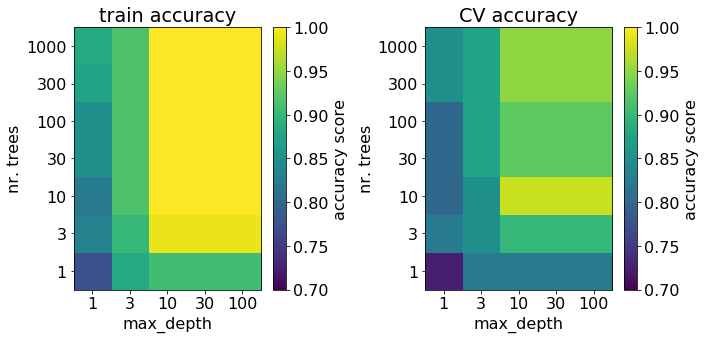

In [16]:
# plot the train and test scores
matplotlib.rcParams.update({'font.size': 16})

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(train_score,origin='lower',vmin=0.7,vmax=1e0)
plt.xticks(np.arange(len(max_depth)),max_depth)
plt.yticks(np.arange(len(n_estimators)),n_estimators)
plt.xlabel('max_depth')
plt.ylabel('nr. trees')
plt.title('train accuracy')
plt.colorbar(label='accuracy score')

plt.subplot(1,2,2)
plt.imshow(CV_score,origin='lower',vmin=0.7,vmax=1e0)
plt.xticks(np.arange(len(max_depth)),max_depth)
plt.yticks(np.arange(len(n_estimators)),n_estimators)
plt.xlabel('max_depth')
plt.ylabel('nr. trees')
plt.title('CV accuracy')
plt.colorbar(label='accuracy score')

plt.tight_layout()

plt.savefig('ml_pipeline.jpg',dpi=150)
plt.show()

<center><img src="ml_pipeline.jpg" width="650"></center>

In [9]:
# initialize the best classifier
clf = RandomForestClassifier(n_estimators=10,max_depth=10,random_state=10)
# fit the training data
clf.fit(X_train,y_train)
# predict the holdout
y_pred = clf.predict(X_test)
# report the accuracy score
print(accuracy_score(y_test,y_pred))


0.95


### <center>Metrics to evaluate your supervised ML models</center>
#### <center>Regression</center>
##### <center>Mean Squared Error: $MSE(y,y') = \frac{1}{n}\sum_{i=1}^{n}(y_i-y_i')^2$</center>
##### <center>Mean Absolute Error: $MAE(y,y') = \frac{1}{n}\sum_{i=1}^{n}|y_i-y_i'|$</center>
##### <center>Coefficient of determination: $R^2(y,y') = 1 - \frac{\sum_i(y_i-y'_i)^2}{\sum_i(y_i-\bar{y})^2}$, where $\bar{y}$ is the average of $y$</center>


### <center>Exercise 2 </center>
#### y = [19, 25, 45,  67, 15]
#### y' = [18, 30, 44, 20, 19]
#### What is the MSE, MAE,  and R2?




### <center>Classification: confusion matrix</center>

<table>
    <tr>
        <td colspan="2" rowspan="2"></td>
        <td colspan="2">Predicted class</td>			
    </tr>
    <tr>
        <td>Predicted Negative (0)</td>
        <td>Predicted Positive (1)</td>
    </tr>
    <tr>
        <td rowspan="2">Actual class</td>
        <td>Condition Negative (0)</td>
        <td><b>True Negative (TN)</b></td>
        <td><b>False Positive (FP)</b></td>
    </tr>
    <tr>
        <td>Condition Positive (1)</td>
        <td><b>False Negative (FN)</b></td>
        <td><b>True Positive (TP)</b></td>
    </tr>
</table>

### We want single number metrics to easily compare models.
#### accuracy = (TN + TP) / (TN+TP+FN+FP)

<table>
    <tr>
        <td colspan="2" rowspan="2"></td>
        <td colspan="2">Predicted class</td>			
    </tr>
    <tr>
        <td>Predicted Negative (0)</td>
        <td>Predicted Positive (1)</td>
    </tr>
    <tr>
        <td rowspan="2">Actual class</td>
        <td>Condition Negative (0)</td>
        <td><b>True Negative (TN)</b></td>
        <td><b>False Positive (FP)</b></td>
    </tr>
    <tr>
        <td>Condition Positive (1)</td>
        <td><b>False Negative (FN)</b></td>
        <td><b>True Positive (TP)</b></td>
    </tr>
</table>

#### R = TP / (TP + FN)
#### Recall is the fraction of correctly identified samples out of all condition positive samples.
#### P = TP / (TP + FP)
#### Precision is the fraction of correctly identified samples out of all the predicted positive samples.

<table>
    <tr>
        <td colspan="2" rowspan="2"></td>
        <td colspan="2">Predicted class</td>			
    </tr>
    <tr>
        <td>Predicted Negative (0)</td>
        <td>Predicted Positive (1)</td>
    </tr>
    <tr>
        <td rowspan="2">Actual class</td>
        <td>Condition Negative (0)</td>
        <td><b>True Negative (TN)</b></td>
        <td><b>False Positive (FP)</b></td>
    </tr>
    <tr>
        <td>Condition Positive (1)</td>
        <td><b>False Negative (FN)</b></td>
        <td><b>True Positive (TP)</b></td>
    </tr>
</table>

#### F1  = 2 ( P * R ) / ( P + R )
#### F1 score is the harmonic mean of precision and recall. Ideal if your problem is imbalanced.

### <center>Exercise 3</center>
<table>
    <tr>
        <td colspan="2" rowspan="2"></td>
        <td colspan="2">Predicted class</td>			
    </tr>
    <tr>
        <td>Predicted Negative (0)</td>
        <td>Predicted Positive (1)</td>
    </tr>
    <tr>
        <td rowspan="2">Actual class</td>
        <td>Condition Negative (0)</td>
        <td><b>87</b></td>
        <td><b>10</b></td>
    </tr>
    <tr>
        <td>Condition Positive (1)</td>
        <td><b>6</b></td>
        <td><b>36</b></td>
    </tr>
</table>

#### What are the accuracy, recall, precision, and f1 scores?

### <center>Exercise 4</center>
#### Which metric would you use in the following problems and why?
#### 1. Predict which emails are spam.
#### 2. Predict tomorrow's temperature.
#### 3. Predict if a patient is sick.
#### 4. Predict the letter grade of essays.


### <center>Recap </center>
#### Now you can
##### - decide which problems can be solved by machine learning and why
##### - describe the similarities and differences between regression, classification, and clustering
##### - describe the bias-variance tradeoff in supervised problems
##### - design a ML pipeline and select an appropriate metric to measure performance
